In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
import pandas as pd
import os

def consolidate_csv_files(folder_path):
    all_data = []  # List to hold data from all CSV files

    for filename in os.listdir(folder_path):
        if filename.endswith('.csv'):
            file_path = os.path.join(folder_path, filename)
            df = pd.read_csv(file_path)
            
            # Add a column with the filename as identifier
            file_name_without_extension = os.path.splitext(filename)[0]
            df['Combination'] = file_name_without_extension
            all_data.append(df)
            # df['SourceFile'] = filename
            # all_data.append(df)

    # Concatenate all dataframes
    combined_df = pd.concat(all_data, ignore_index=True)
    combined_df.rename(columns={"Index":"Graph_id"}, inplace=True)
    # combined_df.sort_values(by=['Combination', 'Graph_id'], inplace=True)
    combined_df.drop(['File'], axis=1, inplace=True)
    

    return combined_df

# Example usage
folder_path = '../data/direct_transitivity'
combined_df = consolidate_csv_files(folder_path)
data = combined_df

# Now you can work with the combined_df DataFrame


In [68]:
combined_df.head()

,Graph_id,Nodes,Total Nodes,Butterflies,X-vars,C-vars,Total vars,Total constraints,Crossings,Opttime,Status,Nodes visited,Setup Time,Combination
0,0,10,12,0,8,7,15,20,0,0.000556,2,0,0.020,d_235689
1,1,13,13,0,6,2,8,8,0,0.000291,2,0,0.001,d_235689
2,2,10,10,0,15,0,15,40,0,0.000040,2,0,0.002,d_235689
3,3,11,18,0,15,12,27,36,0,0.002283,2,0,0.003,d_235689
4,4,12,16,0,12,11,23,30,0,0.000364,2,0,0.002,d_235689


In [69]:
from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
label_encoder = LabelEncoder()

# Fit and transform the column
combined_df['Combination_Encoded'] = label_encoder.fit_transform(combined_df['Combination'])

# combined_df
# print("Mapping:", dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))
combined_df.head()


,Graph_id,Nodes,Total Nodes,Butterflies,X-vars,C-vars,Total vars,Total constraints,Crossings,Opttime,Status,Nodes visited,Setup Time,Combination,Combination_Encoded
0,0,10,12,0,8,7,15,20,0,0.000556,2,0,0.020,d_235689,298
1,1,13,13,0,6,2,8,8,0,0.000291,2,0,0.001,d_235689,298
2,2,10,10,0,15,0,15,40,0,0.000040,2,0,0.002,d_235689,298
3,3,11,18,0,15,12,27,36,0,0.002283,2,0,0.003,d_235689,298
4,4,12,16,0,12,11,23,30,0,0.000364,2,0,0.002,d_235689,298


In [70]:
type(combined_df['Graph_id'])

pandas.core.series.Series

In [71]:
import numpy as np


# Selecting 50 random graph_ids
np.random.seed(786)
random_graph_ids = np.random.choice(combined_df['Graph_id'].unique(), 50, replace=False)

print(len(np.unique(random_graph_ids)))

# Filtering the dataset for these selected graph_ids
filtered_df = combined_df[combined_df['Graph_id'].isin(random_graph_ids)]

# Further filtering for 200 random combinations for these selected graph_ids
# Note: The actual number of rows may be less than 200 if some combinations are not present for the selected graph_ids
random_combinations = np.random.choice(filtered_df['Combination_Encoded'].unique(), 200, replace=False)
filtered_df = filtered_df[filtered_df['Combination_Encoded'].isin(random_combinations)]

# Showing the structure of the filtered dataset
# filtered_df.info()
# filtered_df.head()

50


In [72]:
print(len(combined_df))
print(len(filtered_df))

588800
10000


5


(F_onewayResult(statistic=105.90725343954858, pvalue=1.4048294690368315e-83),
 KruskalResult(statistic=847.9851289909215, pvalue=3.095638244851218e-182))

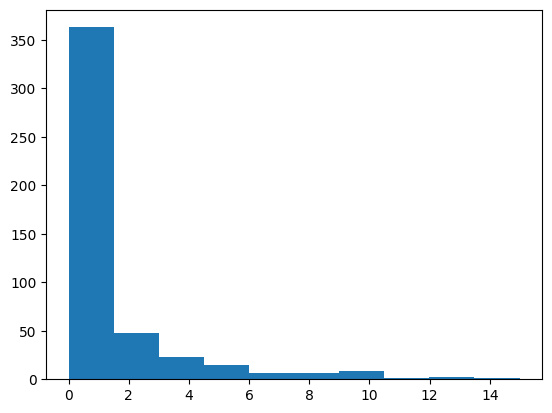

In [74]:
from scipy.stats import f_oneway, kruskal
# Analyzing the performance of different combinations

# Correlation analysis
# correlation_matrix = data[['Nodes', 'Total Nodes', 'Crossings', 'Opttime', 'Status']].corr()

# Visualization of combination performance
# Aggregating data based on combination
# combination_performance = data[data['Status'] == 2].groupby('Combination_Encoded').agg({'Opttime': 'mean', 'Crossings':'mean', 'Status': lambda x: (x == 2).mean() * 100})
combination_performance_status = data.groupby('Graph_id').agg({'Status': lambda x: (x == 2).mean() * 100})
combination_performance_characteristics = data[data['Status'] == 2].groupby('Graph_id').agg({'Opttime': 'mean', 'Crossings':'mean', 'Total Nodes': 'mean'})

combination_performance = pd.merge(combination_performance_status, 
         combination_performance_characteristics, 
         how='inner', 
         left_index=True,
         right_index=True
)


combination_performance['Status'] = np.round(combination_performance['Status'], 2)
combination_performance['Crossings'] = combination_performance['Crossings'].astype(int)
temp = combination_performance[(combination_performance['Status']== 100) & (combination_performance['Crossings']!=0)].sort_values('Crossings', ascending=False).reset_index()
plt.hist(temp['Opttime'])


# Selecting a subset of combinations for the test
sample_combinations = temp['Graph_id'].unique()[:5]
print(len(sample_combinations))
sample_df = combined_df[combined_df['Graph_id'].isin(sample_combinations)]

# ANOVA Test, just doing it but assumptions are not met anyways
anova_results = f_oneway(*[sample_df[sample_df['Graph_id'] == comb]['Opttime'] for comb in sample_combinations])

# Kruskal-Wallis Test (non-parametric)
kruskal_results = kruskal(*[sample_df[sample_df['Graph_id'] == comb]['Opttime'] for comb in sample_combinations])

anova_results, kruskal_results


### Kruskall Wallis Test

#### Smaller Subset 

In [49]:
from scipy.stats import f_oneway, kruskal

# Checking if ANOVA assumptions are met: normality and homogeneity of variances
# For simplicity, let's use a subset of combinations to check these assumptions

# Selecting a subset of combinations for the test
sample_combinations = filtered_df['Combination'].unique()[:5]
sample_df = filtered_df[filtered_df['Combination'].isin(sample_combinations)]

# ANOVA Test, just doing it but assumptions are not met anyways
anova_results = f_oneway(*[sample_df[sample_df['Combination'] == comb]['Opttime'] for comb in sample_combinations])

# Kruskal-Wallis Test (non-parametric)
kruskal_results = kruskal(*[sample_df[sample_df['Combination'] == comb]['Opttime'] for comb in sample_combinations])

anova_results, kruskal_results


(F_onewayResult(statistic=3.516326221450128, pvalue=0.00820201105213675),
 KruskalResult(statistic=14.358708525896532, pvalue=0.006233975321061147))

#### Larger Subset

In [50]:
# Selecting a subset of combinations for the test
sample_combinations = filtered_df['Combination'].unique()
print(len(sample_combinations))
sample_df = filtered_df[filtered_df['Combination'].isin(sample_combinations)]

# ANOVA Test, just doing it but assumptions are not met anyways
anova_results = f_oneway(*[sample_df[sample_df['Combination'] == comb]['Opttime'] for comb in sample_combinations])

# Kruskal-Wallis Test (non-parametric)
kruskal_results = kruskal(*[sample_df[sample_df['Combination'] == comb]['Opttime'] for comb in sample_combinations])

anova_results, kruskal_results


200


(F_onewayResult(statistic=1.5532634179410318, pvalue=1.2563132794660262e-06),
 KruskalResult(statistic=313.59377571327354, pvalue=3.902260185220717e-07))

#### Whole Dataset

In [51]:
# Selecting a subset of combinations for the test
sample_combinations = combined_df['Combination'].unique()
print(len(sample_combinations))
sample_df = combined_df[combined_df['Combination'].isin(sample_combinations)]

# ANOVA Test, just doing it but assumptions are not met anyways
anova_results = f_oneway(*[sample_df[sample_df['Combination'] == comb]['Opttime'] for comb in sample_combinations])

# Kruskal-Wallis Test (non-parametric)
kruskal_results = kruskal(*[sample_df[sample_df['Combination'] == comb]['Opttime'] for comb in sample_combinations])

anova_results, kruskal_results


512


(F_onewayResult(statistic=26.884403011539074, pvalue=0.0),
 KruskalResult(statistic=10131.055629163444, pvalue=0.0))

### Whitney Mann U-test 

#### (Random Pairwise comparison)

In [56]:
from scipy.stats import mannwhitneyu

# For the Mann-Whitney U test, we need to compare two independent samples.
# Let's choose two combinations randomly for this test.

# Selecting two random combinations
random_combinations = np.random.choice(filtered_df['Combination'].unique(), 2, replace=False)
combo1, combo2 = random_combinations

# Extracting the optimization times for these combinations
combo1_times = filtered_df[filtered_df['Combination'] == combo1]['Opttime']
combo2_times = filtered_df[filtered_df['Combination'] == combo2]['Opttime']

# Conducting the Mann-Whitney U test
u_statistic, p_value = mannwhitneyu(combo1_times, combo2_times)

u_statistic, p_value, combo1, combo2


(1336.0, 0.55557849072207, 'd_25', 'd_123457')

#### Top 5 Combinations (top 5 based on success rate) pairwise combinations [With Bonferroni Corrections]

In [57]:
# Filtering top 5 combinations based on the highest success rate
top_combinations = filtered_df.groupby('Combination').agg({'Status': lambda x: (x == 2).mean()}).reset_index()
top_combinations = top_combinations.sort_values('Status', ascending=False).head(5)

# Extracting the top 5 combinations
top_5_combinations = top_combinations['Combination']

# Performing Mann-Whitney U test on all pairs of these top 5 combinations
# Using Bonferroni correction for multiple comparisons
num_tests = len(top_5_combinations) * (len(top_5_combinations) - 1) / 2  # Number of tests
alpha = 0.05 / num_tests  # Adjusted alpha level for Bonferroni correction

# Storing results
results = []

for i in range(len(top_5_combinations)):
    for j in range(i+1, len(top_5_combinations)):
        combo1 = top_5_combinations.iloc[i]
        combo2 = top_5_combinations.iloc[j]

        combo1_times = filtered_df[filtered_df['Combination'] == combo1]['Opttime']
        combo2_times = filtered_df[filtered_df['Combination'] == combo2]['Opttime']

        u_statistic, p_value = mannwhitneyu(combo1_times, combo2_times)
        results.append((combo1, combo2, u_statistic, p_value, p_value < alpha))

results_df = pd.DataFrame(results, columns=['Combination 1', 'Combination 2', 'U Statistic', 'p-value', 'Significant'])

results_df


,Combination 1,Combination 2,U Statistic,p-value,Significant
0,d_1249,d_1269,1184.0,0.651597,False
1,d_1249,d_156,1268.0,0.903975,False
2,d_1249,d_124589,1187.0,0.666567,False
3,d_1249,d_124678,1212.0,0.796007,False
4,d_1269,d_156,1331.0,0.578927,False
5,d_1269,d_124589,1231.0,0.898516,False
6,d_1269,d_124678,1264.0,0.925851,False
7,d_156,d_124589,1149.0,0.488417,False
8,d_156,d_124678,1200.0,0.732920,False
9,d_124589,d_124678,1299.0,0.738115,False


#### Top 10 Combinations (top 10 based on success rate) pairwise combinations [With Bonferroni Corrections]

In [58]:
# Filtering top 10 combinations based on the highest success rate
top_combinations_10 = filtered_df.groupby('Combination').agg({'Status': lambda x: (x == 2).mean()}).reset_index()
top_combinations_10 = top_combinations_10.sort_values('Status', ascending=False).head(10)

# Extracting the top 10 combinations
top_10_combinations = top_combinations_10['Combination']

# Performing Mann-Whitney U test on all pairs of these top 10 combinations
# Using Bonferroni correction for multiple comparisons
num_tests_10 = len(top_10_combinations) * (len(top_10_combinations) - 1) / 2  # Number of tests
alpha_10 = 0.05 / num_tests_10  # Adjusted alpha level for Bonferroni correction

# Storing results
results_10 = []

for i in range(len(top_10_combinations)):
    for j in range(i+1, len(top_10_combinations)):
        combo1_10 = top_10_combinations.iloc[i]
        combo2_10 = top_10_combinations.iloc[j]

        combo1_10_times = filtered_df[filtered_df['Combination'] == combo1_10]['Opttime']
        combo2_10_times = filtered_df[filtered_df['Combination'] == combo2_10]['Opttime']

        u_statistic_10, p_value_10 = mannwhitneyu(combo1_10_times, combo2_10_times)
        results_10.append((combo1_10, combo2_10, u_statistic_10, p_value_10, p_value_10 < alpha_10))

results_df_10 = pd.DataFrame(results_10, columns=['Combination 1', 'Combination 2', 'U Statistic', 'p-value', 'Significant'])

results_df_10


,Combination 1,Combination 2,U Statistic,p-value,Significant
0,d_1249,d_1269,1184.0,0.651597,False
1,d_1249,d_156,1268.0,0.903975,False
2,d_1249,d_124589,1187.0,0.666567,False
3,d_1249,d_124678,1212.0,0.796007,False
4,d_1249,d_12456,1170.0,0.583652,False
5,d_1249,d_1245,1188.0,0.671588,False
6,d_1249,d_1278,1204.0,0.753773,False
7,d_1249,d_145,1169.0,0.578927,False
8,d_1249,d_124689,1199.0,0.727737,False
9,d_1269,d_156,1331.0,0.578927,False


#### Wilcoxon Test

Performed to compare the optimization times for the same graphs under the top two combinations based on success rate
How a graph performs under 2 combinations

In [59]:
# Extracting the top 2 combinations based on the highest success rate
top_2_combinations = top_combinations_10.head(2)['Combination']

# Extracting the names of the top 2 combinations
combo1_top2, combo2_top2 = top_2_combinations.iloc[0], top_2_combinations.iloc[1]

# Filtering data for these top 2 combinations
data_combo1 = filtered_df[filtered_df['Combination'] == combo1_top2]
data_combo2 = filtered_df[filtered_df['Combination'] == combo2_top2]

# Merging the datasets on 'Graph_id' to ensure paired observations
paired_data = pd.merge(data_combo1[['Graph_id', 'Opttime']], data_combo2[['Graph_id', 'Opttime']], on='Graph_id', suffixes=('_1', '_2'))

# Performing the Wilcoxon Signed-Rank Test
from scipy.stats import wilcoxon

wilcoxon_results = wilcoxon(paired_data['Opttime_1'], paired_data['Opttime_2'])

wilcoxon_results, combo1_top2, combo2_top2


(WilcoxonResult(statistic=203.0, pvalue=9.898605478397826e-06),
 'd_1249',
 'd_1269')

### Cluster Analysis

/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


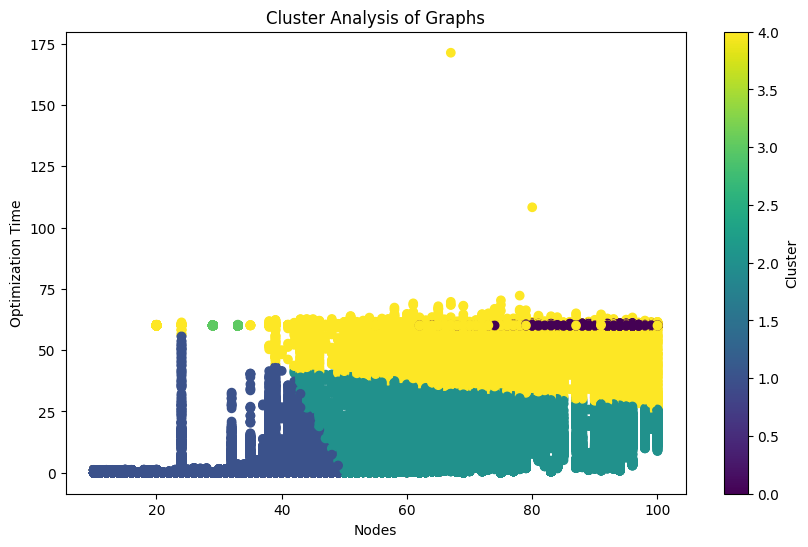

In [61]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load your dataset
# Replace 'your_dataset.csv' with the path to your dataset
df = combined_df #pd.read_csv('your_dataset.csv')

# Selecting relevant features for cluster analysis
# Adjust these features based on your dataset
features_for_clustering = ['Opttime', 'Nodes', 'Crossings']
clustering_data = df[features_for_clustering]

# Normalizing the data
scaler = StandardScaler()
clustering_data_scaled = scaler.fit_transform(clustering_data)

# Performing K-means clustering
# You can change the number of clusters if needed
kmeans = KMeans(n_clusters=5, random_state=0)
clusters = kmeans.fit_predict(clustering_data_scaled)

# Adding the cluster labels to the dataset
df['Cluster'] = clusters

# Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(df['Nodes'], df['Opttime'], c=df['Cluster'], cmap='viridis', marker='o')
plt.title('Cluster Analysis of Graphs')
plt.xlabel('Nodes')
plt.ylabel('Optimization Time')
plt.colorbar(label='Cluster')
plt.show()


## Failure ones


### Whitney Mann Random

In [62]:
from scipy.stats import mannwhitneyu

# For the Mann-Whitney U test, we need to compare two independent samples.
# Let's choose two combinations randomly for this test.

# Selecting two random combinations
random_combinations = np.random.choice(filtered_df['Combination'].unique(), 2, replace=False)
combo1, combo2 = random_combinations

# Extracting the optimization times for these combinations
combo1_times = filtered_df[filtered_df['Combination'] == combo1]['Opttime']
combo2_times = filtered_df[filtered_df['Combination'] == combo2]['Opttime']

# Conducting the Mann-Whitney U test
u_statistic, p_value = mannwhitneyu(combo1_times, combo2_times)

u_statistic, p_value, combo1, combo2


(1088.0, 0.26555732018637457, 'd_146789', 'd_679')

#### Whitney Mann Top 5 failed combinations

In [64]:
# Filtering top 5 combinations based on the highest success rate
top_combinations = filtered_df.groupby('Combination').agg({'Status': lambda x: (x == 9).mean()}).reset_index()
top_combinations = top_combinations.sort_values('Status').head(5)

# Extracting the top 5 combinations
top_5_combinations = top_combinations['Combination']

# Performing Mann-Whitney U test on all pairs of these top 5 combinations
# Using Bonferroni correction for multiple comparisons
num_tests = len(top_5_combinations) * (len(top_5_combinations) - 1) / 2  # Number of tests
alpha = 0.05 / num_tests  # Adjusted alpha level for Bonferroni correction

# Storing results
results = []

for i in range(len(top_5_combinations)):
    for j in range(i+1, len(top_5_combinations)):
        combo1 = top_5_combinations.iloc[i]
        combo2 = top_5_combinations.iloc[j]

        combo1_times = filtered_df[filtered_df['Combination'] == combo1]['Opttime']
        combo2_times = filtered_df[filtered_df['Combination'] == combo2]['Opttime']

        u_statistic, p_value = mannwhitneyu(combo1_times, combo2_times)
        results.append((combo1, combo2, u_statistic, p_value, p_value < alpha))

results_df = pd.DataFrame(results, columns=['Combination 1', 'Combination 2', 'U Statistic', 'p-value', 'Significant'])

results_df


,Combination 1,Combination 2,U Statistic,p-value,Significant
0,d_1249,d_1679,1208.0,0.774806,False
1,d_1249,d_1278,1204.0,0.753773,False
2,d_1249,d_128,1165.0,0.560211,False
3,d_1249,d_124689,1199.0,0.727737,False
4,d_1679,d_1278,1246.0,0.980750,False
5,d_1679,d_128,1213.0,0.801331,False
6,d_1679,d_124689,1228.0,0.882171,False
7,d_1278,d_128,1223.0,0.855044,False
8,d_1278,d_124689,1229.0,0.887615,False
9,d_128,d_124689,1268.0,0.903975,False


#### Whitney Mann failure top 10

In [65]:
# Filtering top 10 combinations based on the highest success rate
top_combinations_10 = filtered_df.groupby('Combination').agg({'Status': lambda x: (x == 9).mean()}).reset_index()
top_combinations_10 = top_combinations_10.sort_values('Status').head(10)

# Extracting the top 10 combinations
top_10_combinations = top_combinations_10['Combination']

# Performing Mann-Whitney U test on all pairs of these top 10 combinations
# Using Bonferroni correction for multiple comparisons
num_tests_10 = len(top_10_combinations) * (len(top_10_combinations) - 1) / 2  # Number of tests
alpha_10 = 0.05 / num_tests_10  # Adjusted alpha level for Bonferroni correction

# Storing results
results_10 = []

for i in range(len(top_10_combinations)):
    for j in range(i+1, len(top_10_combinations)):
        combo1_10 = top_10_combinations.iloc[i]
        combo2_10 = top_10_combinations.iloc[j]

        combo1_10_times = filtered_df[filtered_df['Combination'] == combo1_10]['Opttime']
        combo2_10_times = filtered_df[filtered_df['Combination'] == combo2_10]['Opttime']

        u_statistic_10, p_value_10 = mannwhitneyu(combo1_10_times, combo2_10_times)
        results_10.append((combo1_10, combo2_10, u_statistic_10, p_value_10, p_value_10 < alpha_10))

results_df_10 = pd.DataFrame(results_10, columns=['Combination 1', 'Combination 2', 'U Statistic', 'p-value', 'Significant'])

results_df_10


,Combination 1,Combination 2,U Statistic,p-value,Significant
0,d_1249,d_1679,1208.0,0.774806,False
1,d_1249,d_1278,1204.0,0.753773,False
2,d_1249,d_128,1165.0,0.560211,False
3,d_1249,d_124689,1199.0,0.727737,False
4,d_1249,d_124678,1212.0,0.796007,False
5,d_1249,d_124589,1187.0,0.666567,False
6,d_1249,d_12458,1194.0,0.702011,False
7,d_1249,d_12456,1170.0,0.583652,False
8,d_1249,d_1245,1188.0,0.671588,False
9,d_1679,d_1278,1246.0,0.980750,False
